In [2]:
# Import necessary libraries and functions
from data_loader import load_data, preprocess_data, load_sample_data
from time_series import perform_time_series_analysis
from linear_regression import perform_linear_regression
from random_forest import perform_random_forest
from neural_network import perform_neural_network
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Load and preprocess data
# stations_info, status_data = load_data()
# merged_data = preprocess_data(stations_info, status_data)

# Load sample data
stations_info, status_sample = load_sample_data(sample_size=1000)
merged_data = preprocess_data(stations_info, status_sample)

# Display basic statistics
print(merged_data.describe())

       station_id    capacity  num_bikes_available  num_docks_available  \
count  998.000000  998.000000           998.000000           998.000000   
mean   267.942886   25.784569             9.710421            16.074148   
min      1.000000    0.000000             0.000000             0.000000   
25%    145.250000   22.000000             3.000000            10.000000   
50%    276.000000   26.000000             8.000000            16.000000   
75%    388.750000   28.000000            14.000000            22.000000   
max    541.000000   54.000000            52.000000            49.000000   
std    146.108023    6.482960             8.184514             8.273080   

                       last_reported    altitude         lat         lon  \
count                            998  992.000000  998.000000  998.000000   
mean   2024-05-16 16:08:29.755510784   36.481855   41.398441    2.166289   
min              2024-01-01 01:40:55    2.000000   41.346775    2.109154   
25%              202

c:\Users\danys\tfm\analytics\time_series.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = station_data['num_bikes_available'].resample('H').mean()
c:\Users\danys\tfm\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


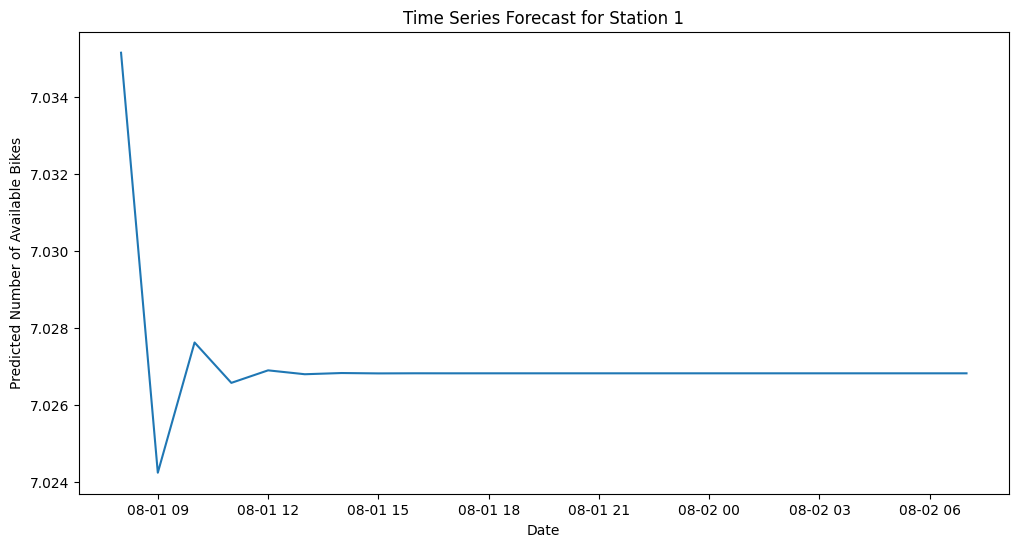

In [3]:
# Time Series Analysis
station_id = 1
forecast = perform_time_series_analysis(merged_data, station_id)
plt.figure(figsize=(12, 6))
plt.plot(forecast.index, forecast.values)
plt.title(f"Time Series Forecast for Station {station_id}")
plt.xlabel("Date")
plt.ylabel("Predicted Number of Available Bikes")
plt.show()

In [4]:
# Linear Regression
lr_model, lr_X_test, lr_y_test = perform_linear_regression(merged_data)
lr_predictions = lr_model.predict(lr_X_test)
lr_mse = mean_squared_error(lr_y_test, lr_predictions)
print(f"Linear Regression MSE: {lr_mse}")

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [5]:
# Random Forest
rf_model, rf_X_test, rf_y_test = perform_random_forest(merged_data)
rf_predictions = rf_model.predict(rf_X_test)
rf_mse = mean_squared_error(rf_y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")

Random Forest MSE: 51.808487237083334


In [ ]:
# Neural Network
nn_model, nn_X_test, nn_y_test, scaler = perform_neural_network(merged_data)
nn_predictions = nn_model.predict(nn_X_test)
nn_mse = mean_squared_error(nn_y_test, nn_predictions)
print(f"Neural Network MSE: {nn_mse}")


In [ ]:
# Compare predictions
plt.figure(figsize=(12, 6))
plt.scatter(lr_y_test, lr_predictions, alpha=0.5, label='Linear Regression')
plt.scatter(rf_y_test, rf_predictions, alpha=0.5, label='Random Forest')
plt.scatter(nn_y_test, nn_predictions, alpha=0.5, label='Neural Network')
plt.plot([0, max(lr_y_test)], [0, max(lr_y_test)], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Number of Available Bikes")
plt.ylabel("Predicted Number of Available Bikes")
plt.legend()
plt.title("Comparison of Model Predictions")
plt.show()